✅ Training set loaded: 6810 sequences
✅ Testing set loaded: 9297 sequences

Training set distribution:
Type
non_AVP    3719
AVP        3091
Name: count, dtype: int64

Testing set distribution:
Type
non_AVP    7894
AVP        1403
Name: count, dtype: int64


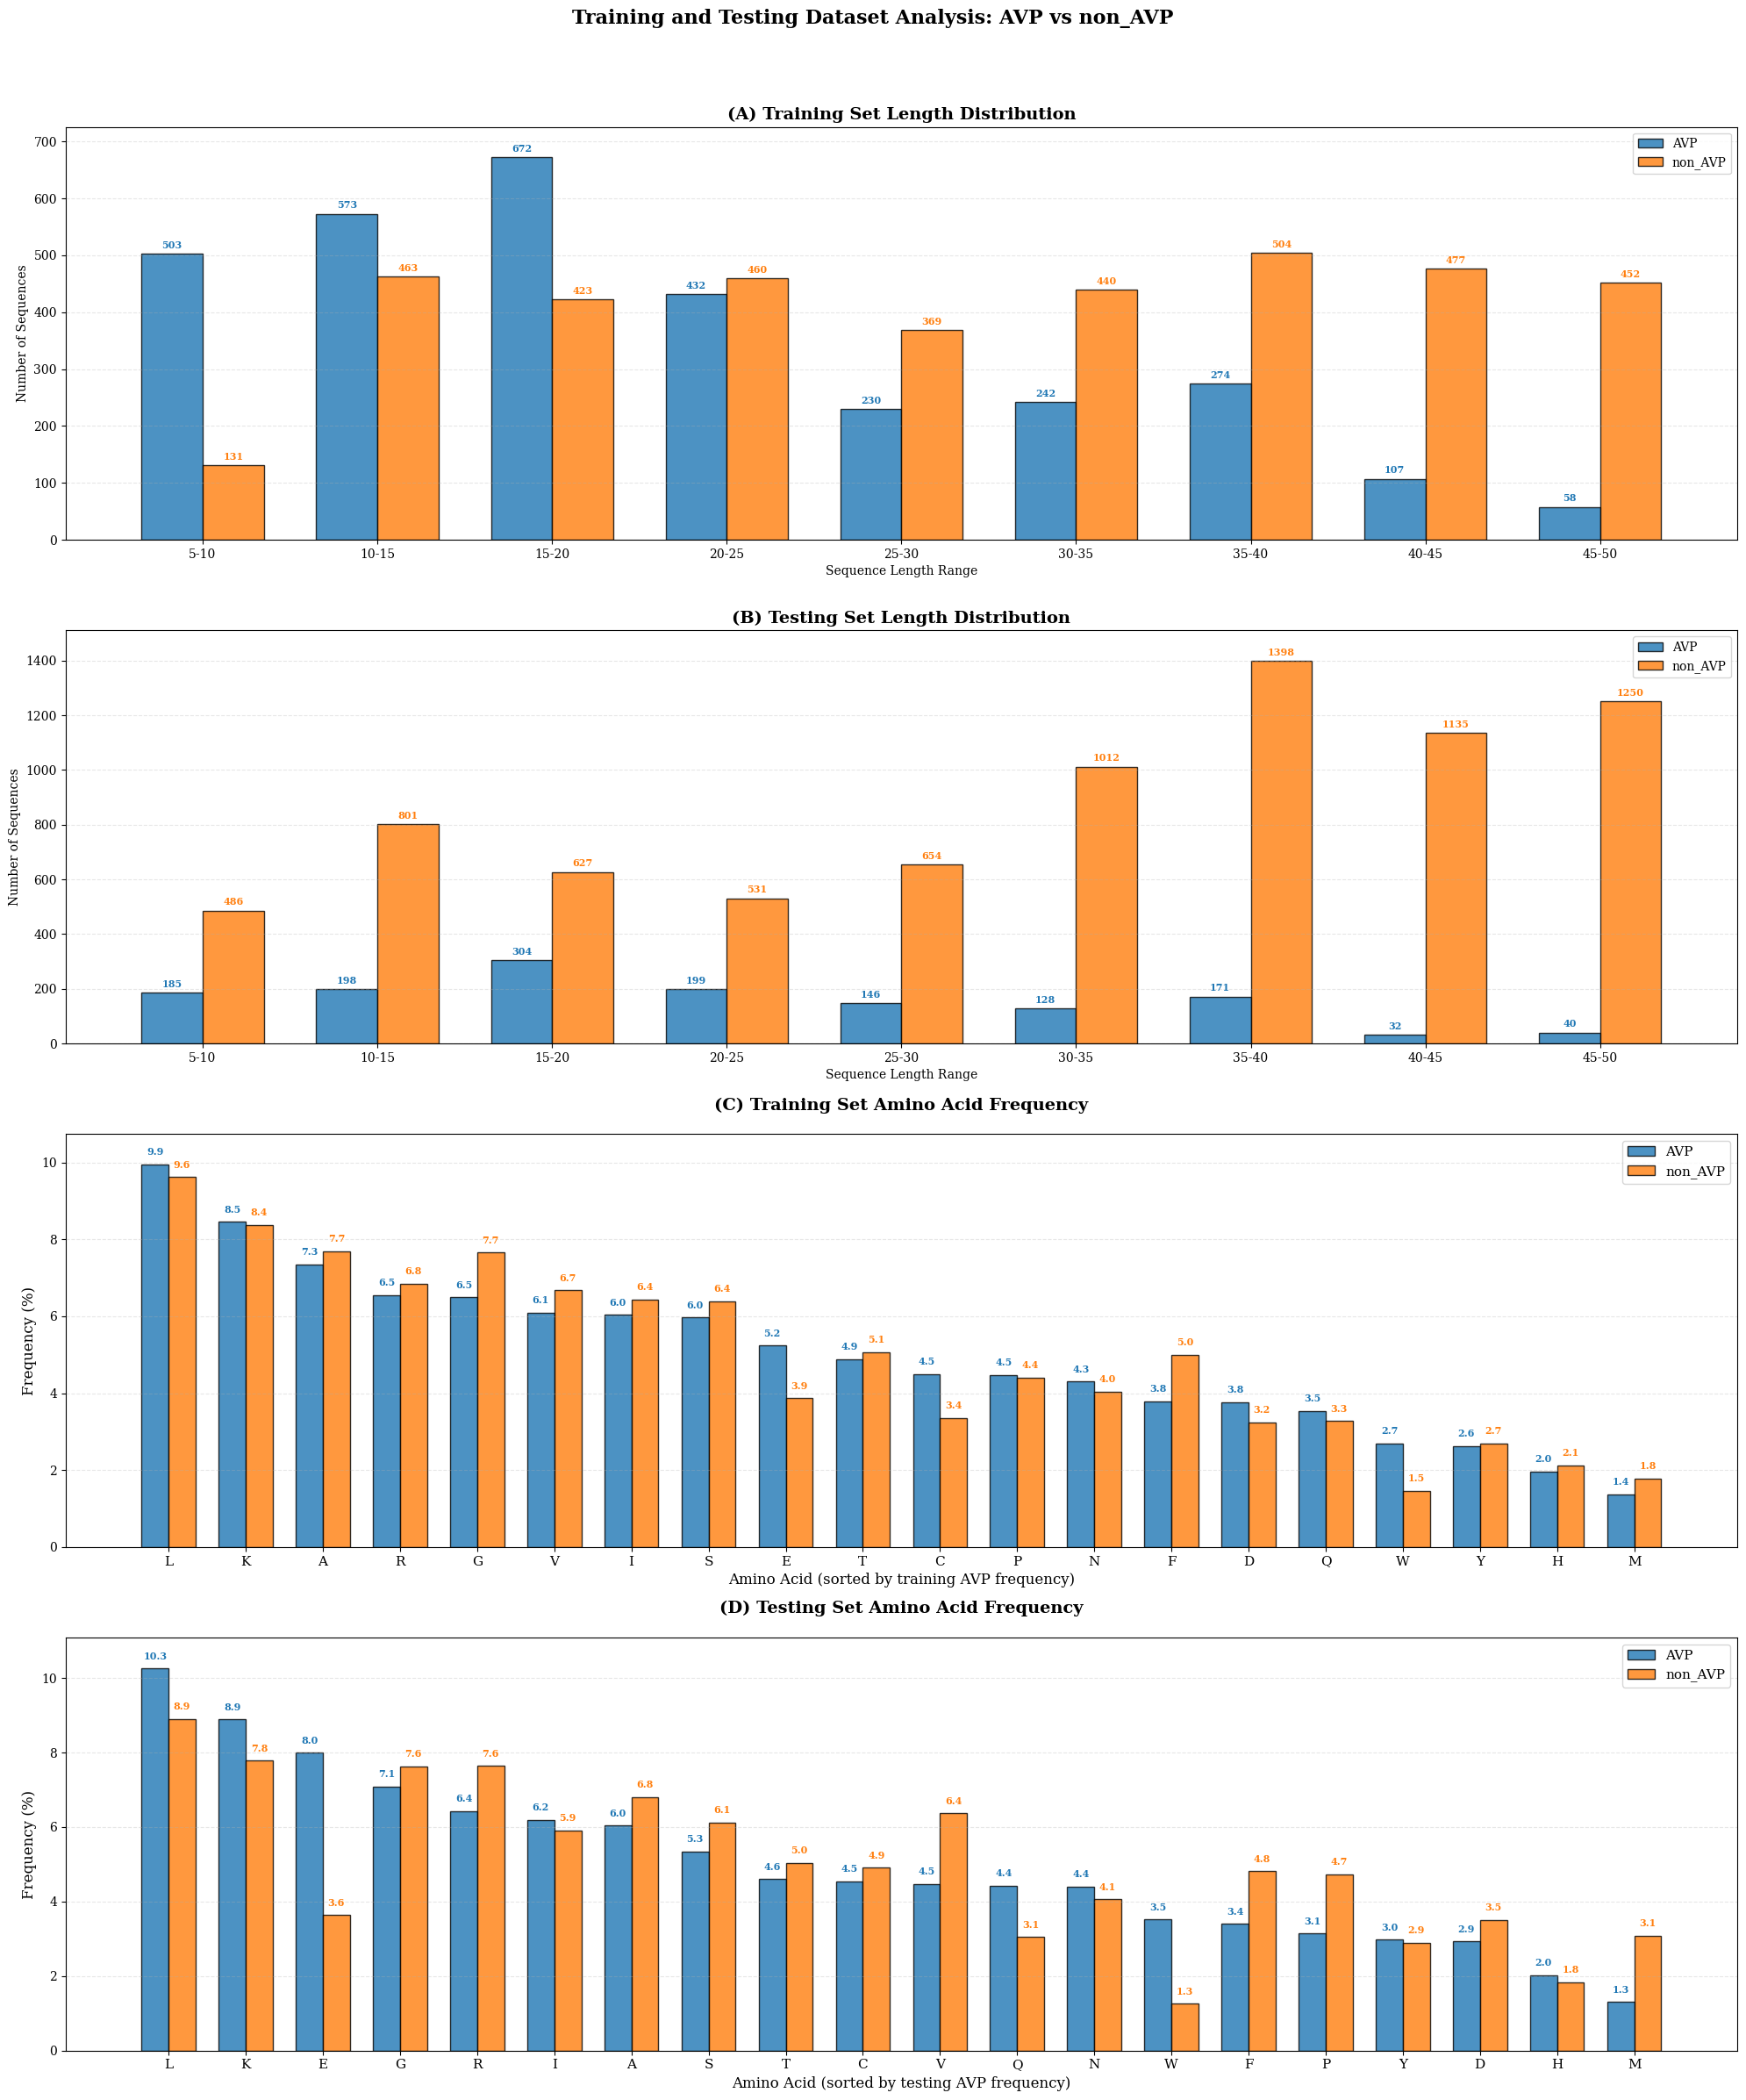


DETAILED DATASET STATISTICS

Training Set:
  Total: 6810 sequences
  AVP: 3091 sequences (45.4%)
  non_AVP: 3719 sequences (54.6%)

Testing Set:
  Total: 9297 sequences
  AVP: 1403 sequences (15.1%)
  non_AVP: 7894 sequences (84.9%)

Sequence Length Statistics:
  Training AVP - Mean: 20.10, Median: 18.00
  Training non_AVP - Mean: 29.01, Median: 30.00
  Testing AVP - Mean: 21.88, Median: 20.00
  Testing non_AVP - Mean: 31.00, Median: 34.00

Top 10 Amino Acids by AVP Frequency (Training Set):
  Amino_Acid  TR_AVP_Freq(%)  TR_non_AVP_Freq(%)  TR_Difference
0          L            9.94                9.62           0.32
1          K            8.46                8.38           0.08
2          A            7.34                7.69          -0.35
3          R            6.54                6.84          -0.30
4          G            6.49                7.65          -1.16
5          V            6.09                6.68          -0.59
6          I            6.04                6.43      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter
import seaborn as sns

# 设置字体
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 10

# 创建Visualization文件夹（如果不存在）
if not os.path.exists('Visualization'):
    os.makedirs('Visualization')

# 读取数据
tr_data = pd.read_csv('TR.csv')
ts_data = pd.read_csv('TS.csv')

print(f"✅ Training set loaded: {len(tr_data)} sequences")
print(f"✅ Testing set loaded: {len(ts_data)} sequences")

# 检查数据分布
print("\nTraining set distribution:")
print(tr_data['Type'].value_counts())
print("\nTesting set distribution:")
print(ts_data['Type'].value_counts())

# 分离AVP和non_AVP数据
tr_avp = tr_data[tr_data['Label'] == 1]
tr_non_avp = tr_data[tr_data['Label'] == 0]
ts_avp = ts_data[ts_data['Label'] == 1]
ts_non_avp = ts_data[ts_data['Label'] == 0]

# 计算氨基酸频率并按频率排序
def calculate_aa_frequency_sorted(sequences):
    all_sequences = ''.join(sequences)
    aa_count = Counter(all_sequences)
    total_aa = len(all_sequences)
    aa_freq = {aa: count/total_aa*100 for aa, count in aa_count.items()}
    # 按频率从高到低排序
    sorted_aa = sorted(aa_freq.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_aa)

# 计算长度分布（用于区间柱状图）
def calculate_length_distribution_bins(data_avp, data_non_avp, bin_size=5):
    # 获取所有长度的范围
    all_lengths = list(data_avp['Length']) + list(data_non_avp['Length'])
    min_length = min(all_lengths)
    max_length = max(all_lengths)
    
    # 创建区间
    bins = list(range(min_length, max_length + bin_size, bin_size))
    if bins[-1] < max_length:
        bins.append(bins[-1] + bin_size)
    
    # 计算每个区间的数量
    avp_counts = []
    non_avp_counts = []
    bin_labels = []
    
    for i in range(len(bins) - 1):
        start = bins[i]
        end = bins[i + 1]
        
        # 计算在此区间内的序列数量
        avp_in_bin = len(data_avp[(data_avp['Length'] >= start) & (data_avp['Length'] < end)])
        non_avp_in_bin = len(data_non_avp[(data_non_avp['Length'] >= start) & (data_non_avp['Length'] < end)])
        
        # 处理最后一个区间（包含最大值）
        if i == len(bins) - 2:
            avp_in_bin = len(data_avp[(data_avp['Length'] >= start) & (data_avp['Length'] <= end)])
            non_avp_in_bin = len(data_non_avp[(data_non_avp['Length'] >= start) & (data_non_avp['Length'] <= end)])
        
        avp_counts.append(avp_in_bin)
        non_avp_counts.append(non_avp_in_bin)
        bin_labels.append(f"{start}-{end}")
    
    return bin_labels, avp_counts, non_avp_counts

# 创建4×1子图，调整主标题位置
fig, axes = plt.subplots(4, 1, figsize=(20, 24))
fig.suptitle('Training and Testing Dataset Analysis: AVP vs non_AVP', fontsize=16, fontweight='bold', y=0.995)

# ===== (A) 训练集长度分布对比 =====
tr_bin_labels, tr_avp_counts, tr_non_avp_counts = calculate_length_distribution_bins(tr_avp, tr_non_avp, bin_size=5)

x_pos = np.arange(len(tr_bin_labels))
width = 0.35

# 使用对比更明显的颜色：深蓝色和橙红色
bars_avp = axes[0].bar(x_pos - width/2, tr_avp_counts, width, 
            label='AVP', alpha=0.8, color='#1f77b4', edgecolor='black')
bars_non_avp = axes[0].bar(x_pos + width/2, tr_non_avp_counts, width, 
            label='non_AVP', alpha=0.8, color='#ff7f0e', edgecolor='black')

# 在所有柱子上添加数值
max_count = max(max(tr_avp_counts), max(tr_non_avp_counts))
for i, (bar_avp, bar_non_avp) in enumerate(zip(bars_avp, bars_non_avp)):
    # AVP柱子数值
    height_avp = bar_avp.get_height()
    axes[0].text(bar_avp.get_x() + bar_avp.get_width()/2., height_avp + max_count * 0.01,
                 f'{int(height_avp)}', ha='center', va='bottom', fontsize=8, 
                 fontweight='bold', color='#1f77b4')
    
    # non_AVP柱子数值
    height_non_avp = bar_non_avp.get_height()
    axes[0].text(bar_non_avp.get_x() + bar_non_avp.get_width()/2., height_non_avp + max_count * 0.01,
                 f'{int(height_non_avp)}', ha='center', va='bottom', fontsize=8,
                 fontweight='bold', color='#ff7f0e')

# 调整Y轴范围
axes[0].set_ylim(0, max_count * 1.08)
axes[0].set_title('(A) Training Set Length Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Sequence Length Range')
axes[0].set_ylabel('Number of Sequences')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(tr_bin_labels)  # 不旋转标签
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# ===== (B) 测试集长度分布对比 =====
ts_bin_labels, ts_avp_counts, ts_non_avp_counts = calculate_length_distribution_bins(ts_avp, ts_non_avp, bin_size=5)

x_pos = np.arange(len(ts_bin_labels))

bars_avp = axes[1].bar(x_pos - width/2, ts_avp_counts, width, 
            label='AVP', alpha=0.8, color='#1f77b4', edgecolor='black')
bars_non_avp = axes[1].bar(x_pos + width/2, ts_non_avp_counts, width, 
            label='non_AVP', alpha=0.8, color='#ff7f0e', edgecolor='black')

# 在所有柱子上添加数值
max_count = max(max(ts_avp_counts), max(ts_non_avp_counts))
for i, (bar_avp, bar_non_avp) in enumerate(zip(bars_avp, bars_non_avp)):
    # AVP柱子数值
    height_avp = bar_avp.get_height()
    axes[1].text(bar_avp.get_x() + bar_avp.get_width()/2., height_avp + max_count * 0.01,
                 f'{int(height_avp)}', ha='center', va='bottom', fontsize=8, 
                 fontweight='bold', color='#1f77b4')
    
    # non_AVP柱子数值
    height_non_avp = bar_non_avp.get_height()
    axes[1].text(bar_non_avp.get_x() + bar_non_avp.get_width()/2., height_non_avp + max_count * 0.01,
                 f'{int(height_non_avp)}', ha='center', va='bottom', fontsize=8,
                 fontweight='bold', color='#ff7f0e')

# 调整Y轴范围
axes[1].set_ylim(0, max_count * 1.08)
axes[1].set_title('(B) Testing Set Length Distribution', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Sequence Length Range')
axes[1].set_ylabel('Number of Sequences')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(ts_bin_labels)  # 不旋转标签
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

# ===== 氨基酸频率分析 =====

# 计算各组的氨基酸频率（按频率排序）
tr_avp_freq = calculate_aa_frequency_sorted(tr_avp['Sequence'])
tr_non_avp_freq = calculate_aa_frequency_sorted(tr_non_avp['Sequence'])
ts_avp_freq = calculate_aa_frequency_sorted(ts_avp['Sequence'])
ts_non_avp_freq = calculate_aa_frequency_sorted(ts_non_avp['Sequence'])

# 训练集氨基酸排序（按训练集AVP频率排序）
tr_all_aa = list(tr_avp_freq.keys())

# 测试集氨基酸排序（按测试集AVP频率排序）
ts_all_aa = list(ts_avp_freq.keys())

# ===== (C) 训练集氨基酸频率对比 =====
tr_avp_values = [tr_avp_freq.get(aa, 0) for aa in tr_all_aa]
tr_non_avp_values = [tr_non_avp_freq.get(aa, 0) for aa in tr_all_aa]

x_pos = np.arange(len(tr_all_aa))
width = 0.35

bars_tr_avp = axes[2].bar(x_pos - width/2, tr_avp_values, width, 
                          label='AVP', alpha=0.8, color='#1f77b4', edgecolor='black')
bars_tr_non_avp = axes[2].bar(x_pos + width/2, tr_non_avp_values, width, 
                              label='non_AVP', alpha=0.8, color='#ff7f0e', edgecolor='black')

# 在每个柱子上添加百分比数值
for i, (bar_avp, bar_non_avp) in enumerate(zip(bars_tr_avp, bars_tr_non_avp)):
    # AVP柱子上的数值
    height_avp = bar_avp.get_height()
    if height_avp > 1.0:  # 只显示大于1.0%的数值
        axes[2].text(bar_avp.get_x() + bar_avp.get_width()/2., height_avp + 0.2,
                     f'{height_avp:.1f}', ha='center', va='bottom', fontsize=8, 
                     fontweight='bold', color='#1f77b4')
    
    # non_AVP柱子上的数值
    height_non_avp = bar_non_avp.get_height()
    if height_non_avp > 1.0:  # 只显示大于1.0%的数值
        axes[2].text(bar_non_avp.get_x() + bar_non_avp.get_width()/2., height_non_avp + 0.2,
                     f'{height_non_avp:.1f}', ha='center', va='bottom', fontsize=8,
                     fontweight='bold', color='#ff7f0e')

# 调整Y轴范围
max_val = max(max(tr_avp_values), max(tr_non_avp_values))
axes[2].set_ylim(0, max_val * 1.08)
axes[2].set_title('(C) Training Set Amino Acid Frequency', fontweight='bold', fontsize=14, pad=20)
axes[2].set_xlabel('Amino Acid (sorted by training AVP frequency)', fontsize=12)
axes[2].set_ylabel('Frequency (%)', fontsize=12)
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(tr_all_aa, fontsize=11)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3, axis='y', linestyle='--')

# ===== (D) 测试集氨基酸频率对比 =====
ts_avp_values = [ts_avp_freq.get(aa, 0) for aa in ts_all_aa]
ts_non_avp_values = [ts_non_avp_freq.get(aa, 0) for aa in ts_all_aa]

x_pos_ts = np.arange(len(ts_all_aa))

bars_ts_avp = axes[3].bar(x_pos_ts - width/2, ts_avp_values, width, 
                          label='AVP', alpha=0.8, color='#1f77b4', edgecolor='black')
bars_ts_non_avp = axes[3].bar(x_pos_ts + width/2, ts_non_avp_values, width, 
                              label='non_AVP', alpha=0.8, color='#ff7f0e', edgecolor='black')

# 在每个柱子上添加百分比数值
for i, (bar_avp, bar_non_avp) in enumerate(zip(bars_ts_avp, bars_ts_non_avp)):
    height_avp = bar_avp.get_height()
    if height_avp > 1.0:
        axes[3].text(bar_avp.get_x() + bar_avp.get_width()/2., height_avp + 0.2,
                     f'{height_avp:.1f}', ha='center', va='bottom', fontsize=8,
                     fontweight='bold', color='#1f77b4')
    
    height_non_avp = bar_non_avp.get_height()
    if height_non_avp > 1.0:
        axes[3].text(bar_non_avp.get_x() + bar_non_avp.get_width()/2., height_non_avp + 0.2,
                     f'{height_non_avp:.1f}', ha='center', va='bottom', fontsize=8,
                     fontweight='bold', color='#ff7f0e')

# 调整Y轴范围
max_val = max(max(ts_avp_values), max(ts_non_avp_values))
axes[3].set_ylim(0, max_val * 1.08)
axes[3].set_title('(D) Testing Set Amino Acid Frequency', fontweight='bold', fontsize=14, pad=20)
axes[3].set_xlabel('Amino Acid (sorted by testing AVP frequency)', fontsize=12)
axes[3].set_ylabel('Frequency (%)', fontsize=12)
axes[3].set_xticks(x_pos_ts)
axes[3].set_xticklabels(ts_all_aa, fontsize=11)
axes[3].legend(fontsize=11)
axes[3].grid(True, alpha=0.3, axis='y', linestyle='--')

# 调整整体布局
plt.tight_layout(rect=[0, 0, 1, 0.97])

# 保存图像
plt.savefig('Visualization/avp_non_avp_comparison_4x1.png', dpi=1200, bbox_inches='tight')
plt.savefig('Visualization/avp_non_avp_comparison_4x1.pdf', bbox_inches='tight')

# 显示图像
plt.show()

# 打印详细统计信息
print("\n" + "="*60)
print("DETAILED DATASET STATISTICS")
print("="*60)

print(f"\nTraining Set:")
print(f"  Total: {len(tr_data)} sequences")
print(f"  AVP: {len(tr_avp)} sequences ({len(tr_avp)/len(tr_data)*100:.1f}%)")
print(f"  non_AVP: {len(tr_non_avp)} sequences ({len(tr_non_avp)/len(tr_data)*100:.1f}%)")

print(f"\nTesting Set:")
print(f"  Total: {len(ts_data)} sequences")
print(f"  AVP: {len(ts_avp)} sequences ({len(ts_avp)/len(ts_data)*100:.1f}%)")
print(f"  non_AVP: {len(ts_non_avp)} sequences ({len(ts_non_avp)/len(ts_data)*100:.1f}%)")

print(f"\nSequence Length Statistics:")
print(f"  Training AVP - Mean: {tr_avp['Length'].mean():.2f}, Median: {tr_avp['Length'].median():.2f}")
print(f"  Training non_AVP - Mean: {tr_non_avp['Length'].mean():.2f}, Median: {tr_non_avp['Length'].median():.2f}")
print(f"  Testing AVP - Mean: {ts_avp['Length'].mean():.2f}, Median: {ts_avp['Length'].median():.2f}")
print(f"  Testing non_AVP - Mean: {ts_non_avp['Length'].mean():.2f}, Median: {ts_non_avp['Length'].median():.2f}")

# 创建训练集详细氨基酸频率对比表
tr_detailed_comparison = pd.DataFrame({
    'Amino_Acid': tr_all_aa,
    'TR_AVP_Freq(%)': [tr_avp_freq.get(aa, 0) for aa in tr_all_aa],
    'TR_non_AVP_Freq(%)': [tr_non_avp_freq.get(aa, 0) for aa in tr_all_aa],
    'TR_Difference': [tr_avp_freq.get(aa, 0) - tr_non_avp_freq.get(aa, 0) for aa in tr_all_aa]
})

# 创建测试集详细氨基酸频率对比表
ts_detailed_comparison = pd.DataFrame({
    'Amino_Acid': ts_all_aa,
    'TS_AVP_Freq(%)': [ts_avp_freq.get(aa, 0) for aa in ts_all_aa],
    'TS_non_AVP_Freq(%)': [ts_non_avp_freq.get(aa, 0) for aa in ts_all_aa],
    'TS_Difference': [ts_avp_freq.get(aa, 0) - ts_non_avp_freq.get(aa, 0) for aa in ts_all_aa]
})

print(f"\nTop 10 Amino Acids by AVP Frequency (Training Set):")
print(tr_detailed_comparison.head(10).round(2))

print(f"\nTop 10 Amino Acids by AVP Frequency (Testing Set):")
print(ts_detailed_comparison.head(10).round(2))

# 创建长度统计对比表
length_stats = pd.DataFrame({
    'Dataset': ['TR_AVP', 'TR_non_AVP', 'TS_AVP', 'TS_non_AVP'],
    'Mean': [tr_avp['Length'].mean(), tr_non_avp['Length'].mean(), 
             ts_avp['Length'].mean(), ts_non_avp['Length'].mean()],
    'Median': [tr_avp['Length'].median(), tr_non_avp['Length'].median(),
               ts_avp['Length'].median(), ts_non_avp['Length'].median()],
    'Min': [tr_avp['Length'].min(), tr_non_avp['Length'].min(),
            ts_avp['Length'].min(), ts_non_avp['Length'].min()],
    'Max': [tr_avp['Length'].max(), tr_non_avp['Length'].max(),
            ts_avp['Length'].max(), ts_non_avp['Length'].max()],
    'Count': [len(tr_avp), len(tr_non_avp), len(ts_avp), len(ts_non_avp)]
})

# 保存详细对比表格
tr_detailed_comparison.to_csv('Visualization/training_aa_frequency_comparison.csv', index=False)
ts_detailed_comparison.to_csv('Visualization/testing_aa_frequency_comparison.csv', index=False)
length_stats.to_csv('Visualization/length_statistics_comparison.csv', index=False)

print(f"\n✅ Files saved:")
print(f"  - Visualization/avp_non_avp_comparison_4x1.png")
print(f"  - Visualization/avp_non_avp_comparison_4x1.pdf") 
print(f"  - Visualization/training_aa_frequency_comparison.csv")
print(f"  - Visualization/testing_aa_frequency_comparison.csv")
print(f"  - Visualization/length_statistics_comparison.csv")